In [4]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import sys
sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
from Slicing import Slicing
from fio import readin
from visualization import contour_generator
import matplotlib as mpl
mpl.style.use('pof')

In [5]:
filename = '/home/jiarong/research/projects/turbulence/channel/onephase_test3/prof_260'
stats = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])

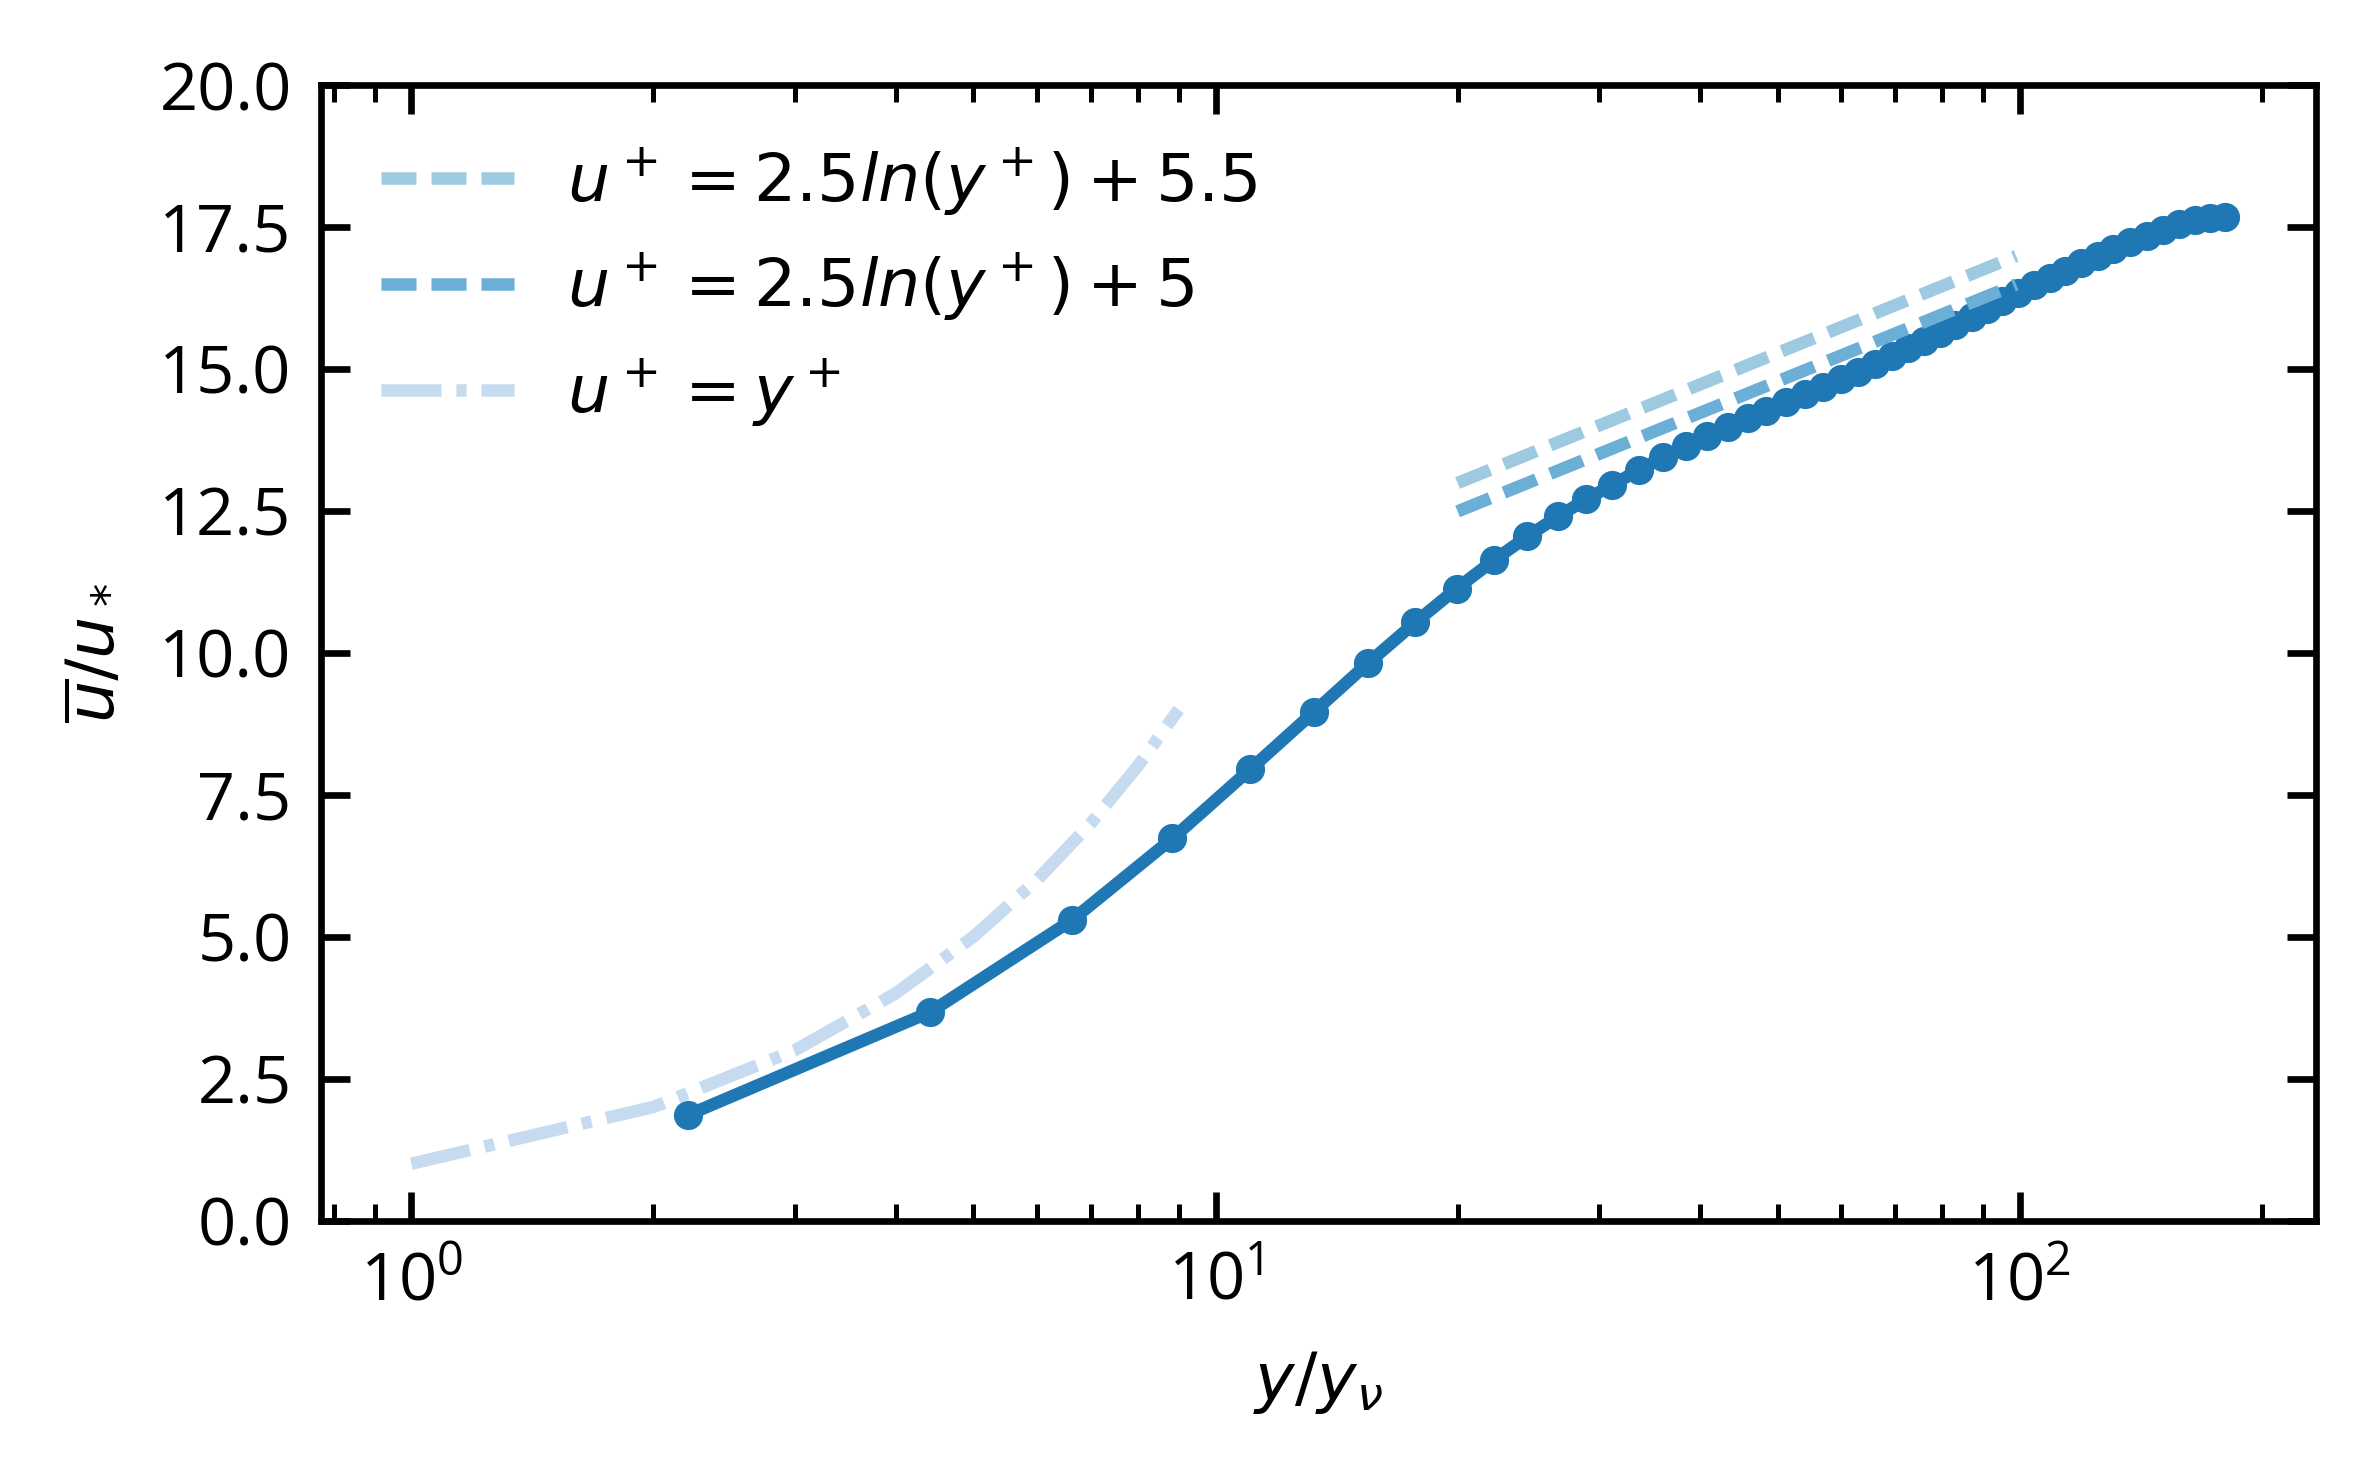

In [32]:
y_tau = 1/180; u_tau = 0.1
plt.figure(figsize=[4,2.5])
plt.plot((stats.y[1:50]+1)/y_tau, stats.ux[1:50]/u_tau, marker='.')
y = np.arange(20,100)
plt.plot(y, 2.5*np.log(y)+5.5, '--', label=r'$u^+=2.5ln(y^+)+5.5$', color=plt.get_cmap('tab20c')(2))
plt.plot(y, 2.5*np.log(y)+5, '--', label=r'$u^+=2.5ln(y^+)+5$', color=plt.get_cmap('tab20c')(1))
y = np.arange(1,10)
plt.plot(y, y,  '-.', label=r'$u^+=y^+$', color=plt.get_cmap('tab20c')(3))
plt.xscale('log'); plt.ylabel('$\overline{u}/u_*$'); plt.xlabel(r'$y/y_\nu$')
plt.ylim([0,20])
plt.legend()

Text(0, 0.5, '$-\\overline{u^{\\prime}v^{\\prime}}/u_*^2$')

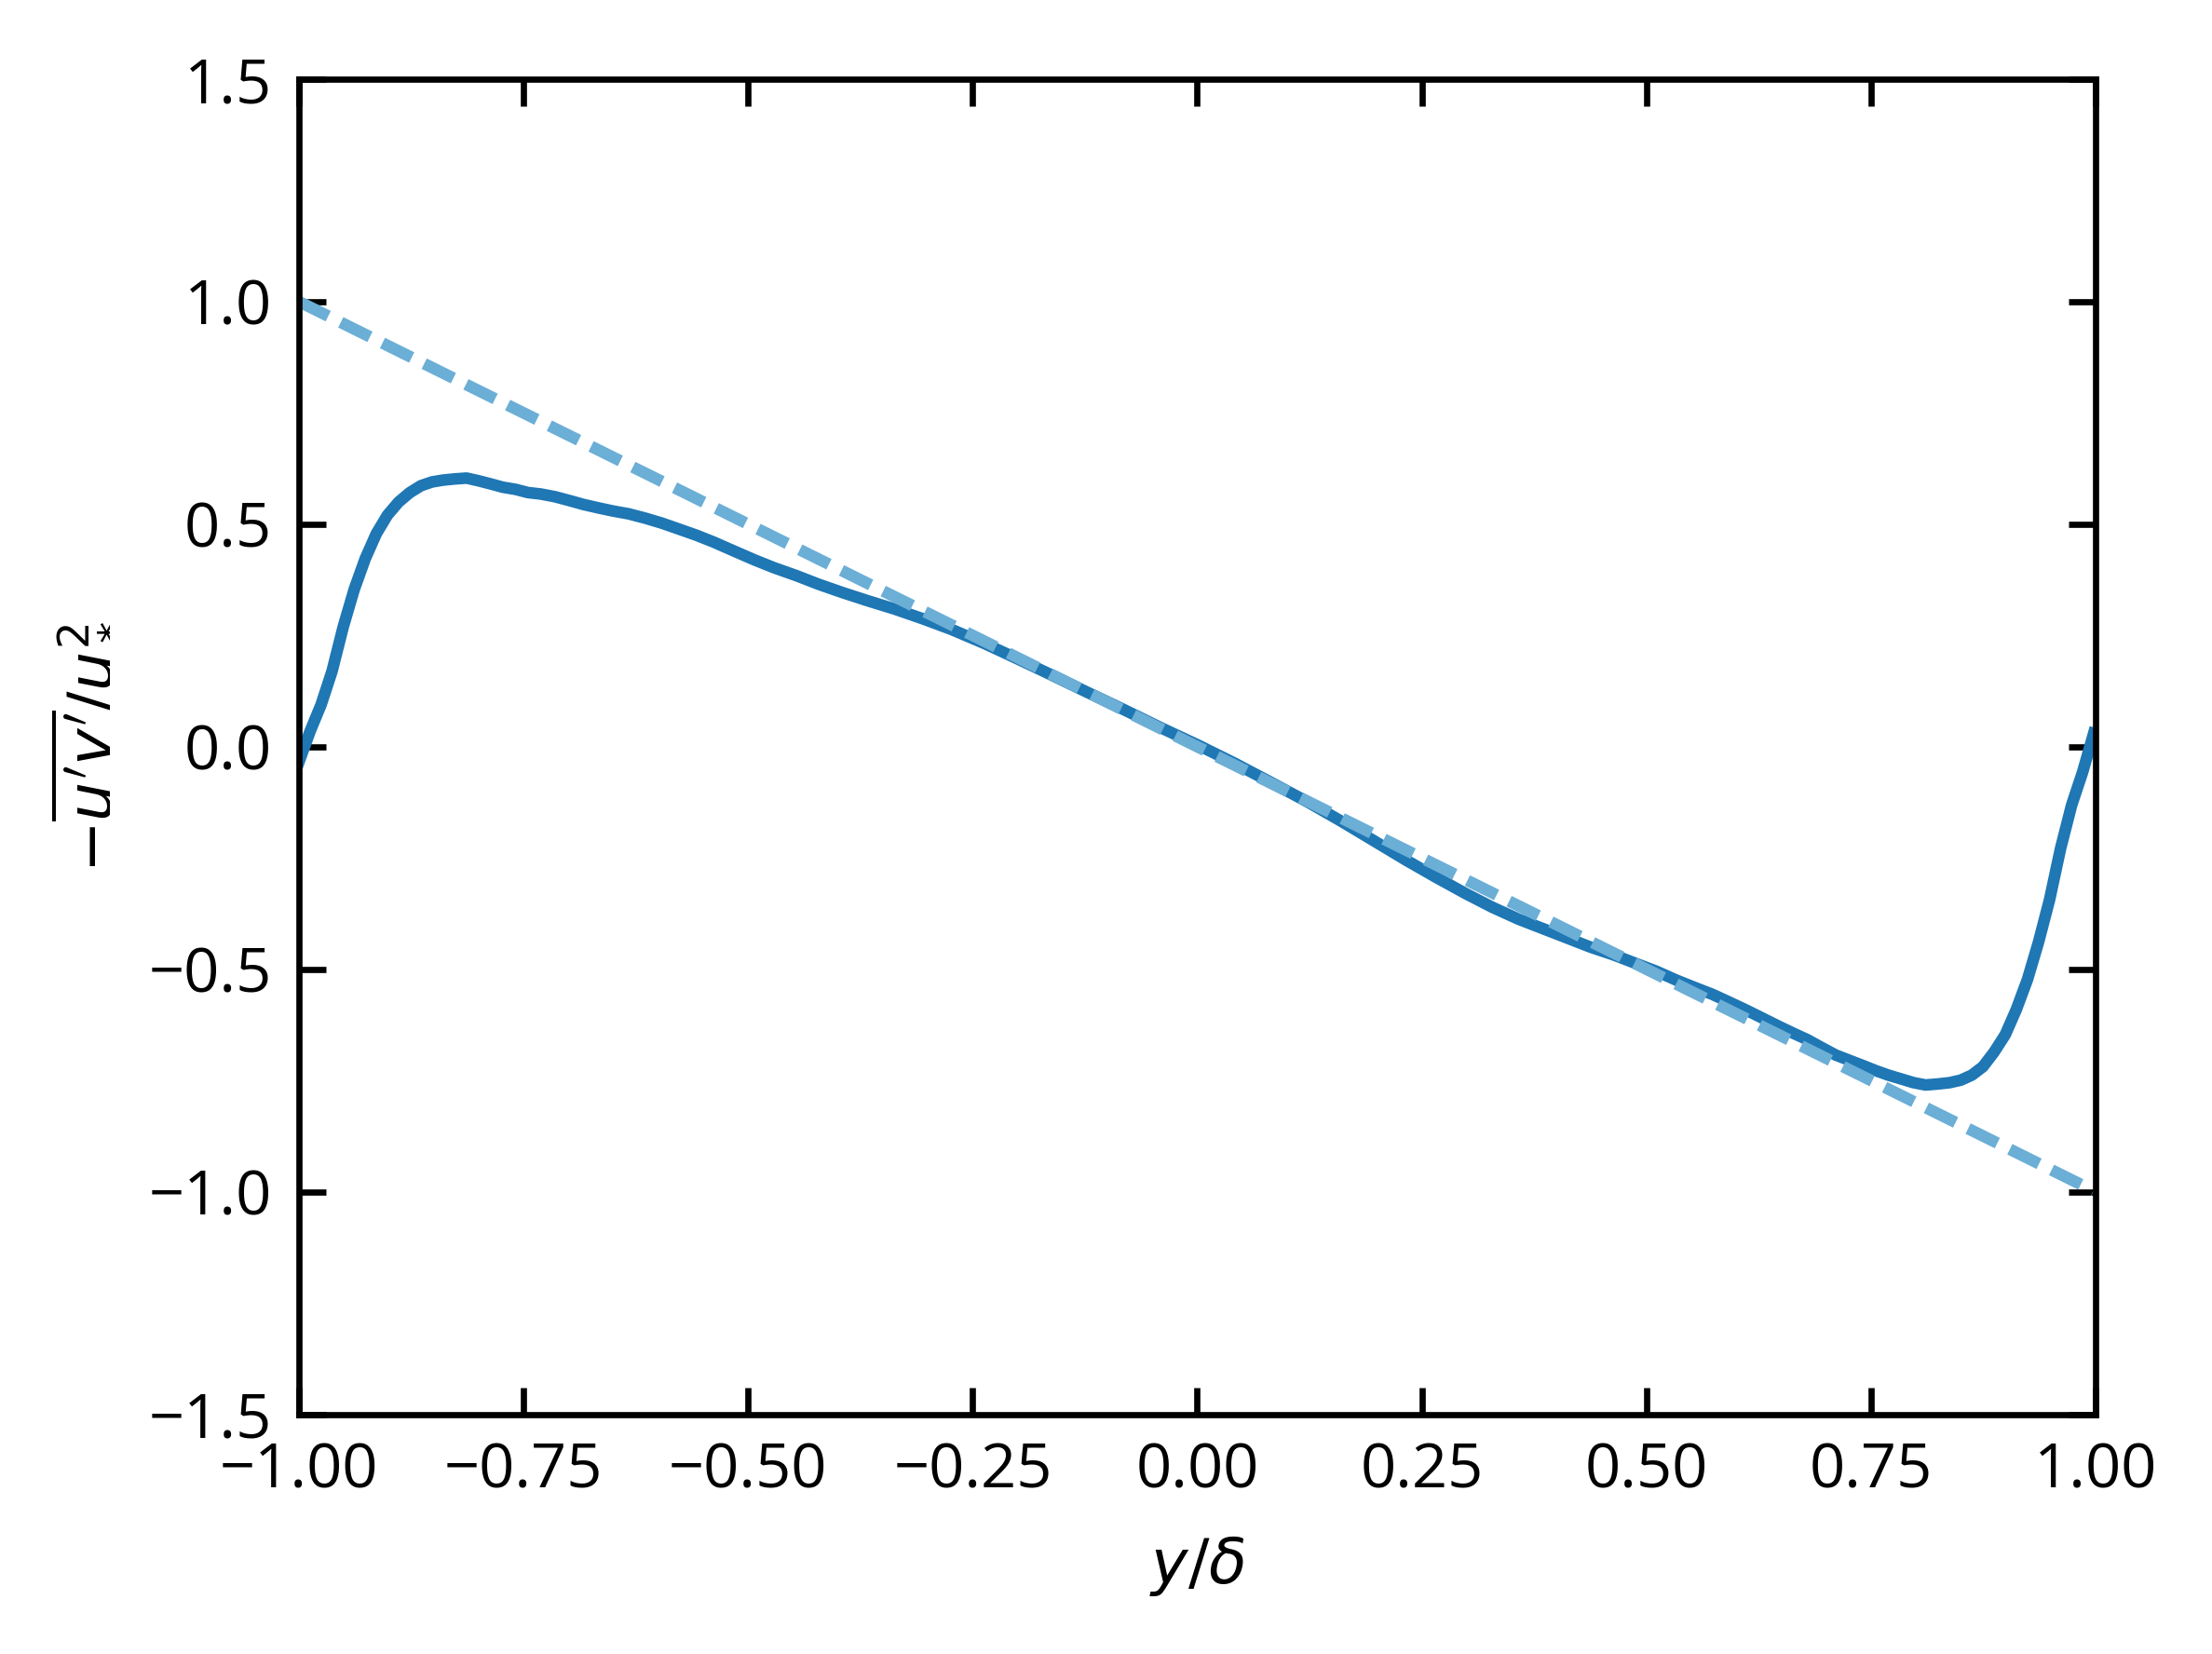

In [43]:
plt.figure(figsize=[4,3])
plt.plot(stats.y, -(stats.uxuy-stats.ux*stats.uy)/0.01)
plt.plot(stats.y, -stats.y, '--', color=plt.get_cmap('tab20c')(1))
plt.ylim([-1.5,1.5]); plt.xlim([-1,1]); plt.xlabel(r'$y/\delta$'); plt.ylabel(r'$-\overline{u^{\prime}v^{\prime}}/u_*^2$')

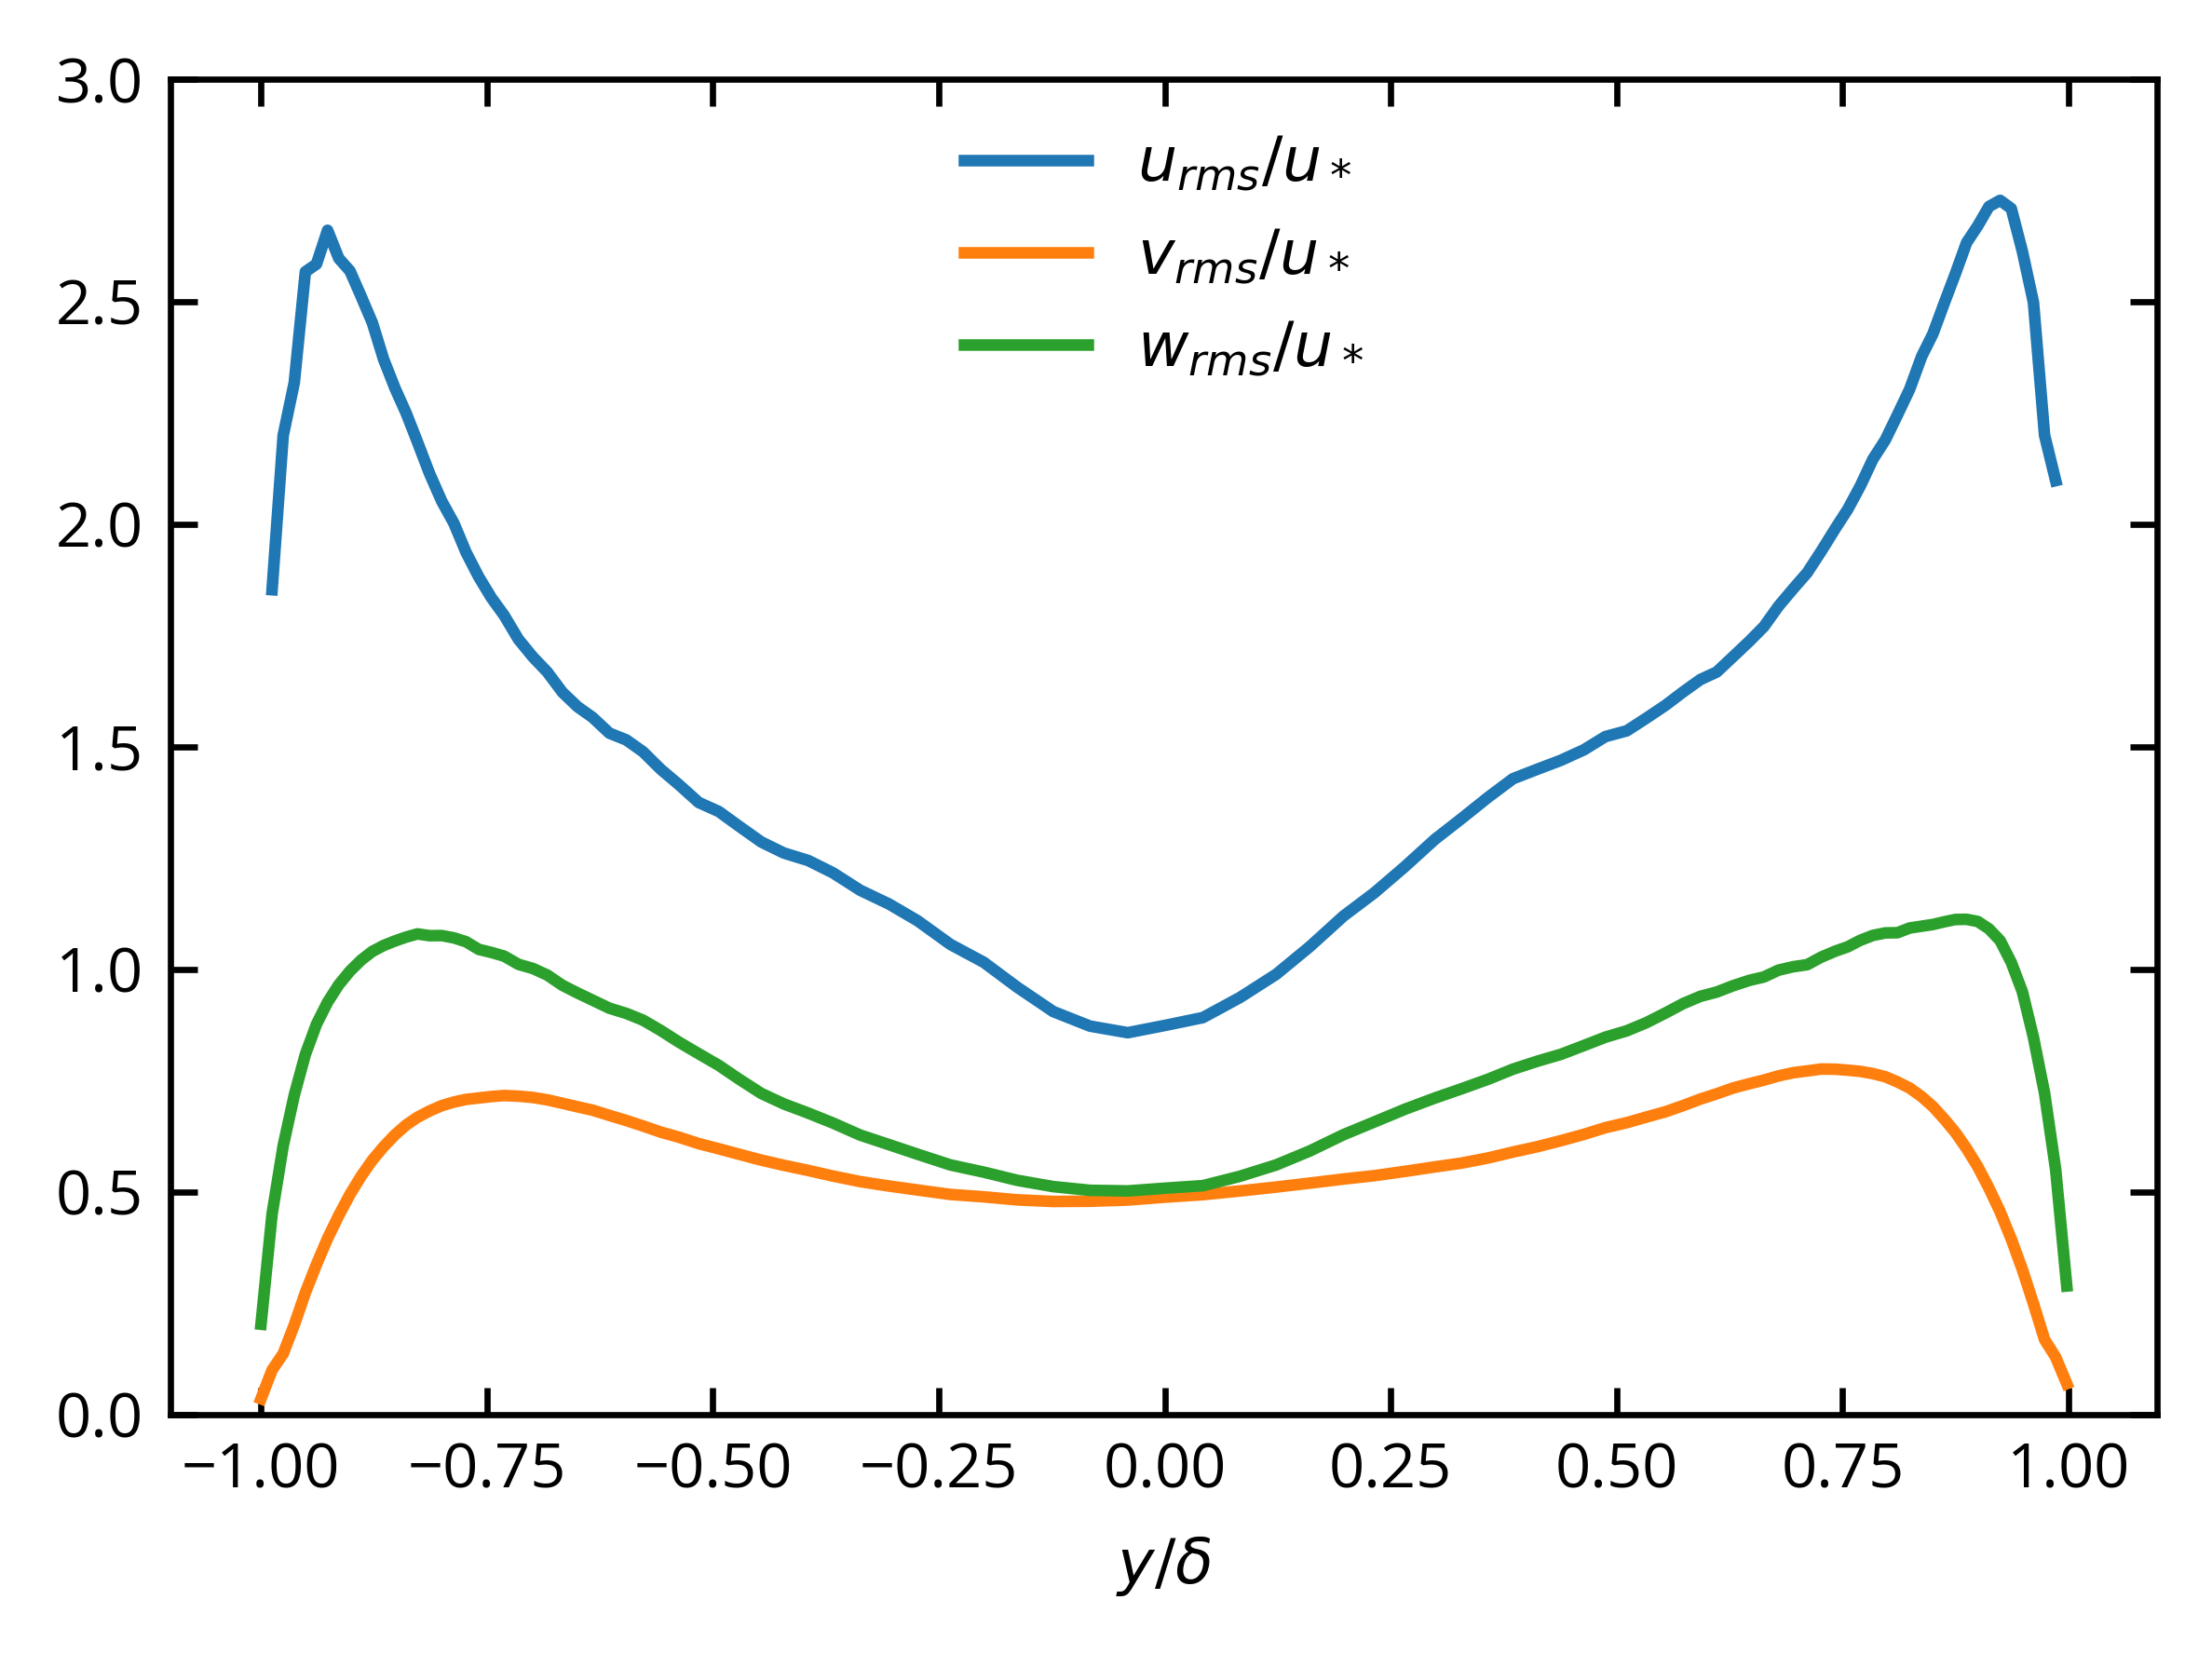

In [44]:
plt.figure(figsize=[4,3])
plt.plot(stats.y, (stats.uxux-stats.ux*stats.ux)**0.5/0.1, label = '$u_{rms}/u_*$')
plt.plot(stats.y, (stats.uyuy-stats.uy*stats.uy)**0.5/0.1, label = '$v_{rms}/u_*$')
plt.plot(stats.y, (stats.uzuz-stats.uz*stats.uz)**0.5/0.1, label = '$w_{rms}/u_*$')
plt.ylim([0,3]); plt.xlabel('$y/\delta$')
plt.legend()

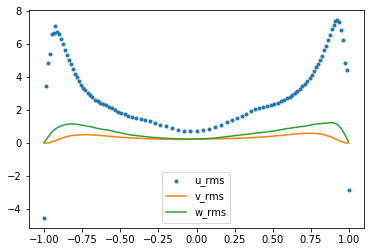

In [140]:
plt.plot(stats.y, (stats.uxux-stats.ux*stats.ux)/0.01, '.', label = 'u_rms')
plt.plot(stats.y, (stats.uyuy-stats.uy*stats.uy)/0.01, label = 'v_rms')
plt.plot(stats.y, (stats.uzuz-stats.uz*stats.uz)/0.01, label = 'w_rms')
# plt.ylim([0,3])
plt.legend()

In [388]:
# Spatial structure - two point correlation R11, R22 and R33
dirname = '/home/jiarong/research/projects/turbulence/channel/onephase_test3/field/'
t = 260; NGRID = 256
# Later change this to taking x-z plane slice
ux_3D = [] ; uy_3D = [] ; uz_3D = []
# axis0 in y, axis1 in x, axis2 in z  (in the code)
for i in range (0,25):
    filename = dirname + 'ux_t%g_slice%g' % (t,i)
    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
    snapshot.reshape([NGRID,NGRID+1])
    ux = snapshot[:,0:NGRID].astype(np.float)
    ux_3D.append(ux)
    filename = dirname + 'uy_t%g_slice%g' % (t,i)
    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
    snapshot.reshape([NGRID,NGRID+1])
    uy = snapshot[:,0:NGRID].astype(np.float)
    uy_3D.append(uy)
    filename = dirname + 'uz_t%g_slice%g' % (t,i)
    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
    snapshot.reshape([NGRID,NGRID+1])
    uz = snapshot[:,0:NGRID].astype(np.float)
    uz_3D.append(uz)
slicei = 18 # 1- (4*np.pi/256*18+0+2*np.pi/256) = 0.0918
# slicei = 3 # 1- (4*np.pi/256*3+0+2*np.pi/256) = 0.828
ux_3D = np.array(ux_3D)
ux_slice = ux_3D[slicei,:,:]
ux_slice_aver = np.average(ux_slice)
uy_3D = np.array(uy_3D)
uy_slice = uy_3D[slicei,:,:]
uy_slice_aver = np.average(uy_slice)
uz_3D = np.array(uz_3D)
uz_slice = uz_3D[slicei,:,:]
uz_slice_aver = np.average(uz_slice)
# Compute two-point correlation
L0 = 4*np.pi
rx = np.zeros(128); R11x = np.zeros(128); R22x = np.zeros(128); R33x = np.zeros(128) # Use first half of data
for i in range (0,128):
    rx[i] = L0/NGRID*i
    ux1 = ux_slice[0:128,:]-ux_slice_aver; ux2 = ux_slice[(0+i):(128+i),:]-ux_slice_aver
    uy1 = uy_slice[0:128,:]-uy_slice_aver; uy2 = uy_slice[(0+i):(128+i),:]-uy_slice_aver
    uz1 = uz_slice[0:128,:]-uz_slice_aver; uz2 = uz_slice[(0+i):(128+i),:]-uz_slice_aver
    R11x[i] = np.average(ux1*ux2)/np.average((ux_slice[0:128,:]-ux_slice_aver)*(ux_slice[0:128,:]-ux_slice_aver))
    R22x[i] = np.average(uy1*uy2)/np.average((uy_slice[0:128,:]-uy_slice_aver)*(uy_slice[0:128,:]-uy_slice_aver))
    R33x[i] = np.average(uz1*uz2)/np.average((uz_slice[0:128,:]-uz_slice_aver)*(uz_slice[0:128,:]-uz_slice_aver))
rz = np.zeros(128); R11z = np.zeros(128); R22z = np.zeros(128); R33z = np.zeros(128)
for i in range (0,128):
    rz[i] = L0/NGRID*i
    ux1 = ux_slice[:,0:128]-ux_slice_aver; ux2 = ux_slice[:,(0+i):(128+i)]-ux_slice_aver
    uy1 = uy_slice[:,0:128]-uy_slice_aver; uy2 = uy_slice[:,(0+i):(128+i)]-uy_slice_aver
    uz1 = uz_slice[:,0:128]-uz_slice_aver; uz2 = uz_slice[:,(0+i):(128+i)]-uz_slice_aver
    R11z[i] = np.average(ux1*ux2)/np.average((ux_slice[:,0:128]-ux_slice_aver)*(ux_slice[:,0:128]-ux_slice_aver))
    R22z[i] = np.average(uy1*uy2)/np.average((uy_slice[:,0:128]-uy_slice_aver)*(uy_slice[:,0:128]-uy_slice_aver))
    R33z[i] = np.average(uz1*uz2)/np.average((uz_slice[:,0:128]-uz_slice_aver)*(uz_slice[:,0:128]-uz_slice_aver))

In [389]:
1- (4*np.pi/256*14+0+2*np.pi/256)

0.28823291442106247

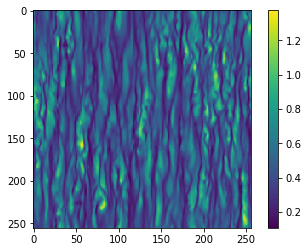

In [390]:
plt.imshow(ux_slice)
plt.colorbar()

Text(0.5, 0, 'x/delta')

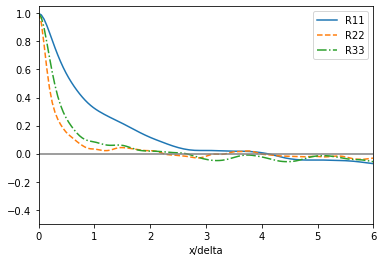

In [278]:
plt.plot(rx, R11x, label='R11'); plt.plot(rx, R22x, '--', label='R22'); plt.plot(rx, R33x, '-.', label='R33')
plt.plot(rx, 0*rx, color = 'grey')
plt.ylim([-0.5,1.05]); plt.xlim([0,6]); plt.legend()
plt.xlabel('x/delta')

Text(0.5, 0, 'z/delta')

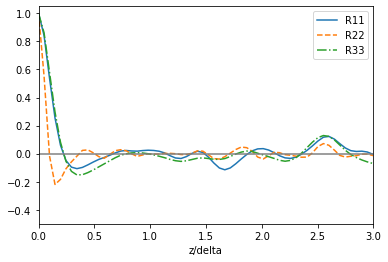

In [279]:
plt.plot(rz, R11z, label='R11'); plt.plot(rz, R22z, '--', label='R22'); plt.plot(rz, R33z, '-.', label='R33')
plt.plot(rz, 0*rz, color = 'grey')
plt.ylim([-0.5,1.05]); plt.xlim([0,3]); plt.legend()
plt.xlabel('z/delta')

Text(0.5, 0, 'kx')

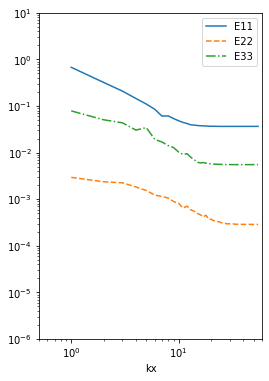

In [391]:
# Spatial structure - spectrum Euu Evv Eww
# Fourier transform of R11
E11 = np.fft.fftn(R11x*np.average((ux_slice[:,0:128]-ux_slice_aver)*(ux_slice[:,0:128]-ux_slice_aver))) 
E22 = np.fft.fftn(R22x*np.average((uy_slice[:,0:128]-uy_slice_aver)*(uy_slice[:,0:128]-uy_slice_aver)))
E33 = np.fft.fftn(R33x*np.average((uz_slice[:,0:128]-uz_slice_aver)*(uz_slice[:,0:128]-uz_slice_aver)))
# E11 = np.absolute(spectrum)
E11 = np.fft.fftshift(E11)*2; E22 = np.fft.fftshift(E22)*2; E33 = np.fft.fftshift(E33)*2
kx = 2*np.pi*np.fft.fftfreq(n=np.size(rx),d=(rx[1]-rx[0]))
kx = np.fft.fftshift(kx)
plt.figure(figsize=[4,6])
plt.plot(kx[65:120], E11[65:120], label='E11')
plt.plot(kx[65:120], E22[65:120], '--', label='E22') 
plt.plot(kx[65:120], E33[65:120], '-.', label='E33')
plt.xscale('log'); plt.yscale('log')
plt.ylim(1e-6,10); plt.xlim(0.5, 60);
plt.legend(); plt.xlabel('kx')

Text(0.5, 0, 'kz')

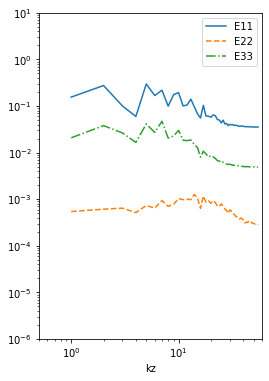

In [392]:
E11 = np.fft.fftn(R11z*np.average((ux_slice[:,0:128]-ux_slice_aver)*(ux_slice[:,0:128]-ux_slice_aver))) 
E22 = np.fft.fftn(R22z*np.average((uy_slice[:,0:128]-uy_slice_aver)*(uy_slice[:,0:128]-uy_slice_aver)))
E33 = np.fft.fftn(R33z*np.average((uz_slice[:,0:128]-uz_slice_aver)*(uz_slice[:,0:128]-uz_slice_aver)))
E11 = np.fft.fftshift(E11)*2; E22 = np.fft.fftshift(E22)*2; E33 = np.fft.fftshift(E33)*2
kx = 2*np.pi*np.fft.fftfreq(n=np.size(rx),d=(rx[1]-rx[0]))
kx = np.fft.fftshift(kx)
plt.figure(figsize=[4,6])
plt.plot(kx[65:120], E11[65:120], label='E11')
plt.plot(kx[65:120], E22[65:120], '--', label='E22')
plt.plot(kx[65:120], E33[65:120], '-.', label='E33')
plt.xscale('log'); plt.yscale('log')
plt.ylim(1e-6,10); plt.xlim(0.5, 60);
plt.legend(); plt.xlabel('kz')